# Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('Training_Laptop_Data.csv')
df['Weight'].astype('float')
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


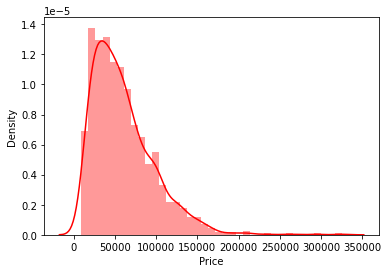

In [3]:
sn.distplot(df['Price'],color='red')
plt.show()

Observation:
Price data is right skewed so we need to convert to gaussian distribution by applying log

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

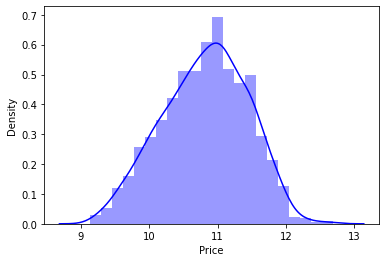

In [4]:
sn.distplot(np.log(df['Price']),color='blue')

Observation:
Price data shows gaussian distribution, we convert back using exp function to see the real data.

In [5]:
# Splitting independent variable and Dependent feature (Price) and applying log to Proce it to convert and saving in Test

test=np.log(df['Price'])
train=df.drop(columns=['Price'],axis=1)

In [6]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [7]:
test.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [8]:
np.exp(test[:1])

0    71378.6832
Name: Price, dtype: float64

### Importing the libraries

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [10]:
# Splitting dataset into training and test dataset using train_test_split

X_train, X_test, y_train, y_test=train_test_split(train,test,test_size=0.15,random_state=2)

#Size of the taining and test dataset
X_train.shape,X_test.shape

((1106, 12), (196, 12))

In [11]:
X_train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand
183,Toshiba,Notebook,8,Windows,2.00,0,0,100.454670,Intel Core i5,0,128,Intel
1141,MSI,Gaming,8,Windows,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia
1049,Asus,Netbook,4,Others,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel
1020,Dell,2 in 1 Convertible,4,Windows,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel
878,Dell,Notebook,4,Windows,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia


In [12]:
X_train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand
183,Toshiba,Notebook,8,Windows,2.00,0,0,100.454670,Intel Core i5,0,128,Intel
1141,MSI,Gaming,8,Windows,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia
1049,Asus,Netbook,4,Others,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel
1020,Dell,2 in 1 Convertible,4,Windows,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel
878,Dell,Notebook,4,Windows,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 183 to 1192
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1106 non-null   object 
 1   TypeName     1106 non-null   object 
 2   Ram          1106 non-null   int64  
 3   OpSys        1106 non-null   object 
 4   Weight       1106 non-null   float64
 5   Touchscreen  1106 non-null   int64  
 6   IPS          1106 non-null   int64  
 7   PPI          1106 non-null   float64
 8   Cpu_Name     1106 non-null   object 
 9   HDD          1106 non-null   int64  
 10  SSD          1106 non-null   int64  
 11  Gpu brand    1106 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 112.3+ KB


In [14]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Touchscreen', 'IPS',
       'PPI', 'Cpu_Name', 'HDD', 'SSD', 'Gpu brand'],
      dtype='object')

In [16]:
categorical=list(X_train.select_dtypes('object').columns)
categorical

['Company', 'TypeName', 'OpSys', 'Cpu_Name', 'Gpu brand']

In [17]:
list(X_train.select_dtypes(['int','float']).columns)

['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'HDD', 'SSD']

In [18]:
numerical=list(X_train.select_dtypes(['int','float']).columns)
numerical

['Ram', 'Weight', 'Touchscreen', 'IPS', 'PPI', 'HDD', 'SSD']

# Linear Regression

In [34]:
# Defining Pipeline and applying oneHotEncoder in categorical variables using ColumnTransformer

#Define categorical Pipeline

cat_pipe=Pipeline([
    ('encoder', OneHotEncoder(sparse=False , drop='first'))
        ])

#Define Numerical Pipeline to convert numerical variable

num_pipe=Pipeline([('scaler',MinMaxScaler())])


# Define column Transformer and combining both categorical and numerical

preprocessor= ColumnTransformer([('cat',cat_pipe,[0,1,3,8,11]),('num',num_pipe,numerical)])
#preprocessor= ColumnTransformer([('cat',cat_pipe,categorical)],remainder='passthrough')

# Creating Pipeline with estimator

estimator=LinearRegression()

pipe=Pipeline([('preprocessor',preprocessor),('model',estimator)])

#fitting the training dataset to pipeline

pipe.fit(X_train,y_train)

# predicting training data set y_test

y_train_pred=pipe.predict(X_test)

# Printing R2 and MAE value

print('R2 Score: ',metrics.r2_score(y_test,y_train_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_train_pred))

R2 Score:  0.806772939047179
MAE:  0.21011396168486696


MAE is 0.21 but it is log(price) we need to apply exp to check the real value

In [35]:
np.exp( 0.21011396168486696)

1.233818659998396

**Our model is predicts +-0.21 more/less than the original price!**

# RIDGE Regression

In [36]:
# Defining Pipeline and applying oneHotEncoder in categorical variables using ColumnTransformer

#Define categorical Pipeline

cat_pipe=Pipeline([
    ('encoder', OneHotEncoder(sparse=False , drop='first'))
        ])

#Define Numerical Pipeline to convert numerical variable

num_pipe=Pipeline([('scaler',MinMaxScaler())])


# Define column Transformer and combining both categorical and numerical

preprocessor= ColumnTransformer([('cat',cat_pipe,[0,1,3,8,11]),('num',num_pipe,numerical)])
#preprocessor= ColumnTransformer([('cat',cat_pipe,categorical)],remainder='passthrough')

# Creating Pipeline with estimator

estimator=Ridge(alpha=0.1)

pipe=Pipeline([('preprocessor',preprocessor),('model',estimator)])

#fitting the training dataset to pipeline

pipe.fit(X_train,y_train)

# predicting training data set y_test

y_train_pred=pipe.predict(X_test)

# Printing R2 and MAE value

print('R2 Score: ',metrics.r2_score(y_test,y_train_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_train_pred))
print('Error in Rupees: ',np.exp(metrics.mean_absolute_error(y_test,y_train_pred)))

R2 Score:  0.8066892827987082
MAE:  0.21021119525080195
Error in Rupees:  1.2339386344191006


# Lasso Regression

In [37]:
# Defining Pipeline and applying oneHotEncoder in categorical variables using ColumnTransformer

#Define categorical Pipeline

cat_pipe=Pipeline([
    ('encoder', OneHotEncoder(sparse=False , drop='first'))
        ])

#Define Numerical Pipeline to convert numerical variable

num_pipe=Pipeline([('scaler',MinMaxScaler())])


# Define column Transformer and combining both categorical and numerical

preprocessor= ColumnTransformer([('cat',cat_pipe,[0,1,3,8,11]),('num',num_pipe,numerical)])
#preprocessor= ColumnTransformer([('cat',cat_pipe,categorical)],remainder='passthrough')

# Creating Pipeline with estimator

estimator=Lasso(alpha=0.001)

pipe=Pipeline([('preprocessor',preprocessor),('model',estimator)])

#fitting the training dataset to pipeline

pipe.fit(X_train,y_train)

# predicting training data set y_test

y_train_pred=pipe.predict(X_test)

# Printing R2 and MAE value

print('R2 Score: ',metrics.r2_score(y_test,y_train_pred))
print('MAE: ', metrics.mean_absolute_error(y_test,y_train_pred))
print('Error in Rupees: ',np.exp(metrics.mean_absolute_error(y_test,y_train_pred)))

R2 Score:  0.8054917146208951
MAE:  0.21153261559456055
Error in Rupees:  1.2355702638302977


**<pre>In linear model performs sightly well than lasso and Ridge Regression with alpha value 0.1 and 
R2 Score:  0.8066892827987082
MAE:  0.21021119525080195
Error in Rupees:  1.2339386344191006**

# Decision Tree

In [38]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

preprocessor = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

estimator = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('estimator',estimator)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('Error in Rupees: ',np.exp(metrics.mean_absolute_error(y_test,y_train_pred)))

R2 score 0.8390608416934713
MAE 0.1821448194662854
Error in Rupees:  1.2355702638302977


# Random Forest

In [39]:
preprocessor = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')


estimator=RandomForestRegressor(n_estimators=100,
                               random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('estimator',estimator)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('Error in Rupees: ',np.exp(metrics.mean_absolute_error(y_test,y_train_pred)))

R2 score 0.8861691364150469
MAE 0.16007163257490573
Error in Rupees:  1.2355702638302977


In [40]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe1.pkl','wb'))

In [41]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [43]:
train.to_csv('TrainingData.csv')

# HyperParameter Tunning for Random Forest

In [39]:
categorical

['Company', 'TypeName', 'OpSys', 'Cpu_Name', 'Gpu brand']

In [40]:
# Using pd.get_dummies to convert the categorical features it is similar to onehot encoder

train=pd.get_dummies(train,columns=categorical,drop_first=True)
train.head()

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Workstation,OpSys_Mac,OpSys_Others,OpSys_Windows,Cpu_Name_Intel Core i3,Cpu_Name_Intel Core i5,Cpu_Name_Intel Core i7,Cpu_Name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [41]:
# Spliting train data into training and test using train_test_split

X_train, X_test,y_train,y_test=train_test_split(train,test,test_size=0.15,random_state=2)
X_train.shape,X_test.shape

((1106, 39), (196, 39))

[Text(436.39653542433604, 478.60434782608695, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(198.41598450236654, 457.3330434782609, 'Cpu_Name_Other Intel Processor <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(130.42635583749671, 436.0617391304348, 'Cpu_Name_Intel Core i5 <= 0.5\nmse = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(87.24619050749408, 414.7904347826087, 'Cpu_Name_Intel Core i7 <= 0.5\nmse = 0.08\nsamples = 154\nvalue = 10.233'),
 Text(36.804450433868, 393.5191304347826, 'Weight <= 1.645\nmse = 0.07\nsamples = 135\nvalue = 10.183'),
 Text(8.45143307914804, 372.24782608695654, 'TypeName_Ultrabook <= 0.5\nmse = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(6.573336839337365, 350.9765217391304, 'Company_Asus <= 0.5\nmse = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(5.6342887194320275, 329.70521739130436, 'Company_Lenovo <= 0.5\nmse = 0.011\nsamples = 7\nvalue = 10.516'),
 Text(4.69524059952669, 308.43391304347824, 'Weight <= 1.615\nmse = 0.003\ns

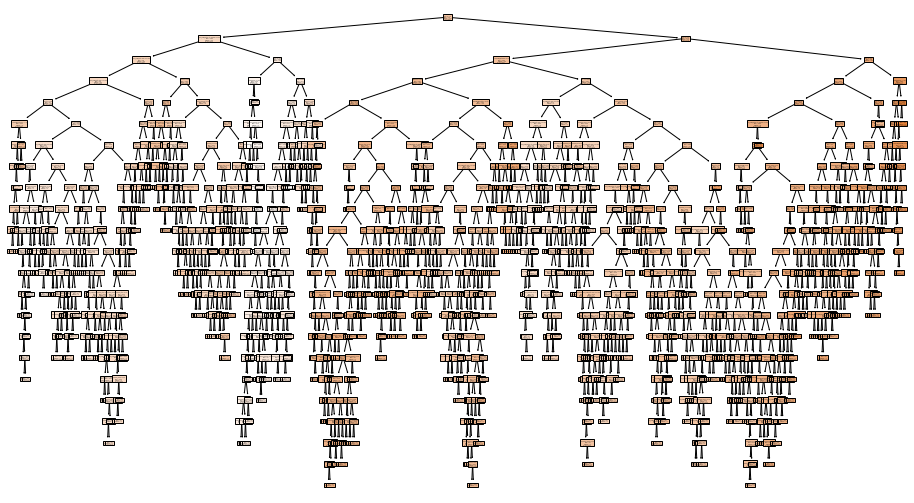

In [42]:
# Applying Decision Tree Regressor to data without hyper parameter to check the cost and time complexity in training the data

reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [43]:
# Using cost_complexity_pruning_path to get the list of alphas

path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [44]:
alphalist=[]

for alpha in ccp_alphas:
    reg=DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

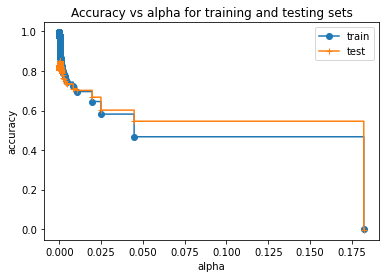

In [45]:
train_scores=[reg.score(X_train,y_train) for reg in alphalist]
test_scores=[reg.score(X_test,y_test) for reg in alphalist]



fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="+", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<pre>Observation:
possible alpha value lies between 0.0025 to 0.0125
We don't want our model to be overfitted so we will selct where train and test scores nearly same

[Text(446.4, 440.31600000000003, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 10.821'),
 Text(223.2, 342.468, 'Cpu_Name_Other Intel Processor <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 10.209'),
 Text(111.6, 244.62, 'mse = 0.13\nsamples = 256\nvalue = 10.387'),
 Text(334.79999999999995, 244.62, 'mse = 0.084\nsamples = 106\nvalue = 9.781'),
 Text(669.5999999999999, 342.468, 'Ram <= 14.0\nmse = 0.215\nsamples = 744\nvalue = 11.119'),
 Text(558.0, 244.62, 'TypeName_Notebook <= 0.5\nmse = 0.159\nsamples = 553\nvalue = 10.967'),
 Text(446.4, 146.772, 'mse = 0.107\nsamples = 268\nvalue = 11.172'),
 Text(669.5999999999999, 146.772, 'PPI <= 114.881\nmse = 0.131\nsamples = 285\nvalue = 10.775'),
 Text(558.0, 48.924000000000035, 'mse = 0.072\nsamples = 59\nvalue = 10.384'),
 Text(781.1999999999999, 48.924000000000035, 'mse = 0.096\nsamples = 226\nvalue = 10.877'),
 Text(781.1999999999999, 244.62, 'mse = 0.12\nsamples = 191\nvalue = 11.558')]

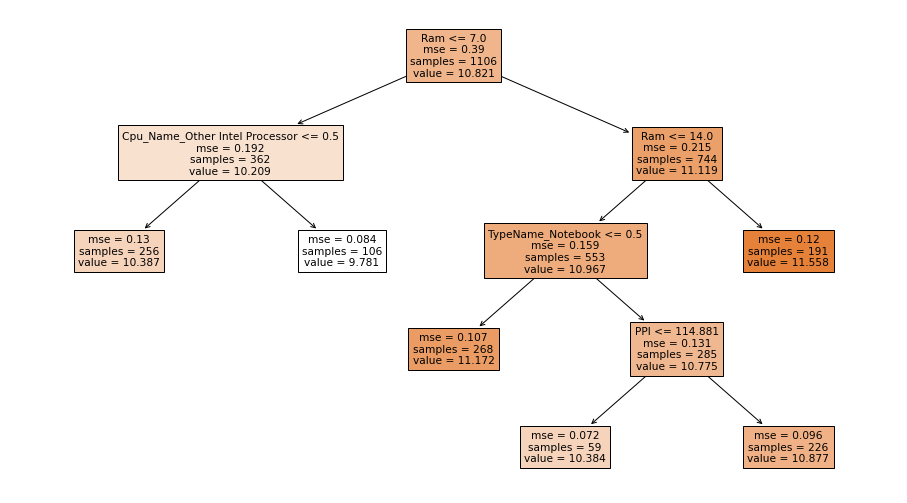

In [46]:
#fitting decision tree with default and random alpha value

reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [77]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.002,0.015,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.002,0.015,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [78]:
params.keys()

dict_keys(['RandomForest', 'Decision Tree'])

In [79]:
params.items()

dict_items([('RandomForest', {'model': RandomForestRegressor(), 'params': {'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'criterion': ['mse', 'mae'], 'max_depth': [1, 8, 15, 22, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.002, 0.0052499999999999995, 0.0085, 0.01175, 0.015], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [2, 5, 10, 14]}}), ('Decision Tree', {'model': DecisionTreeRegressor(), 'params': {'criterion': ['mse', 'mae'], 'max_depth': [1, 8, 15, 22, 30], 'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.002, 0.0052499999999999995, 0.0085, 0.01175, 0.015], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [2, 5, 10, 14]}})])

In [80]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.015, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   3.9s
[CV] END ccp_alpha=0.015, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   4.0s
[CV] END ccp_alpha=0.015, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   3.9s
[CV] END ccp_alpha=0.015, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   3.9s
[CV] END ccp_alpha=0.015, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1200; total time=   4.1s
[CV] END ccp_alpha=0.015, criterion=mae, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END ccp_alph

[CV] END ccp_alpha=0.0085, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0085, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0085, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0085, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.015, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.015, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.015, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.015, criterion=mse, max

In [81]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.076510,"(DecisionTreeRegressor(ccp_alpha=0.002, criter..."
1,Decision Tree,-0.088663,"DecisionTreeRegressor(ccp_alpha=0.002, max_dep..."


In [82]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.076510482925297,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.002, criterion='mae', max_depth=22,
                        min_samples_leaf=10, min_samples_split=5)},
 {'model_name': 'Decision Tree',
  'best_score': -0.08866318045886877,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.002, max_depth=15, max_features='auto',
                        min_samples_leaf=2, min_samples_split=10)}]

<pre>Observation:
    Random forest performs well with alpha value 0.0025, max depth=30 min samples=10 and n_estimators=222 with negative measn sqaure error 0.0814

In [96]:
rf = RandomForestRegressor(ccp_alpha=0.002, max_depth=22,min_samples_leaf=5,
                         random_state=3,max_features=0.75,n_estimators=1200)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8226949883552339


In [87]:
#rf=RandomForestRegressor(n_estimators=1000,
 #                              random_state=3,
  #                            max_samples=0.5,
   #                           max_features=0.75,
    #                          max_depth=15,ccp_alpha=0.001)
#rf.fit(X_train,y_train)
#y_pred = rf.predict(X_test)
#print(metrics.r2_score(y_test,y_pred))

0.8505166863154732


In [97]:
rf.ccp_alpha

0.002

# Prediction on whole dataset

In [98]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([11.2444315]),
 array([11.06009522]),
 array([10.77929551]),
 array([11.54716032]),
 array([11.27546311]),
 array([10.16757971]),
 array([11.4037212]),
 array([11.06009522]),
 array([11.50900225]),
 array([10.98797328]),
 array([10.41293894]),
 array([10.17771239]),
 array([11.53808547]),
 array([10.24027686]),
 array([11.2637198]),
 array([11.27546311]),
 array([10.91223645]),
 array([11.54716032]),
 array([10.57923111]),
 array([11.20444324]),
 array([9.72129921]),
 array([10.96580426]),
 array([10.13675762]),
 array([10.98773599]),
 array([11.02579942]),
 array([10.18211016]),
 array([11.06009522]),
 array([10.88874708]),
 array([11.05513702]),
 array([10.73846273]),
 array([9.77739872]),
 array([10.23823639]),
 array([10.20460848]),
 array([11.54578695]),
 array([11.06009522]),
 array([9.77670181]),
 array([10.15486456]),
 array([10.88845975]),
 array([10.5125456]),
 array([10.89138361]),
 array([10.18112235]),
 array([11.44497001]),
 array([10.39712196]),
 array([10.5526394

In [99]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [100]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,76453.003308
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,63582.606033
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,48016.285412
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,103482.760982
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,78862.657471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36881.854851
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,103344.994029
1299,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,16435.706017
1300,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,33232.638323


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


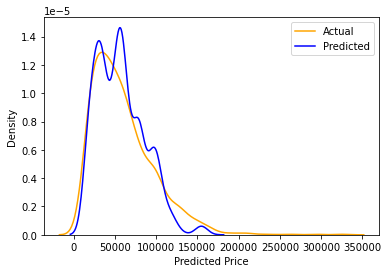

In [101]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor version_2

In [102]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
 
rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8876630583353279


In [103]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

[array([11.18383792]),
 array([10.8672814]),
 array([10.58487447]),
 array([11.80873713]),
 array([11.31859137]),
 array([9.91048194]),
 array([11.4543102]),
 array([10.8672814]),
 array([11.41458101]),
 array([10.82148114]),
 array([10.2007043]),
 array([9.95375605]),
 array([11.75106618]),
 array([10.27092044]),
 array([11.14945387]),
 array([11.31859137]),
 array([10.73185488]),
 array([11.80873713]),
 array([10.29949795]),
 array([10.99646268]),
 array([9.47929198]),
 array([10.88979497]),
 array([9.71645013]),
 array([10.81568519]),
 array([10.83416341]),
 array([10.08346231]),
 array([10.90478217]),
 array([10.67715604]),
 array([11.17760165]),
 array([10.78860444]),
 array([9.6489686]),
 array([9.90000412]),
 array([10.13334899]),
 array([11.63238358]),
 array([10.90478217]),
 array([9.6277515]),
 array([9.93901116]),
 array([10.88308401]),
 array([10.32777507]),
 array([10.78768665]),
 array([10.05532075]),
 array([11.26251303]),
 array([10.37621701]),
 array([10.56114755]),
 a

In [104]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [105]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_Name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,71958.001760
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,52432.473665
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,39532.344885
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,134421.696620
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,82338.277142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,36691.926121
1298,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,87391.874576
1299,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,12982.826977
1300,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,37083.401496


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


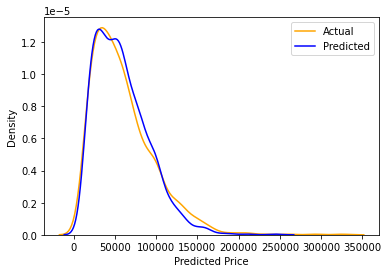

In [106]:
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [107]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [108]:
X_train.iloc[0]

Ram                                 8.00000
Weight                              2.00000
Touchscreen                         0.00000
IPS                                 0.00000
PPI                               100.45467
HDD                                 0.00000
SSD                               128.00000
Company_Apple                       0.00000
Company_Asus                        0.00000
Company_Chuwi                       0.00000
Company_Dell                        0.00000
Company_Fujitsu                     0.00000
Company_Google                      0.00000
Company_HP                          0.00000
Company_Huawei                      0.00000
Company_LG                          0.00000
Company_Lenovo                      0.00000
Company_MSI                         0.00000
Company_Mediacom                    0.00000
Company_Microsoft                   0.00000
Company_Razer                       0.00000
Company_Samsung                     0.00000
Company_Toshiba                 